In [1]:
# Import Libraries and Modules used for class
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import lxml
import seaborn
import statsmodels
import patsy
import requests
from datetime import datetime, timedelta
import requests
import json

# Milestone 5 (Weeks 11 & 12)

Merging the Data and Storing in a Database/Visualizing Data

Now that you have cleaned and transformed your 3 datasets, you need to merge them together and load the data into a database. You can choose what kind of database (SQLLite or MySQL, Postgre SQL are all free options).

Once all the data is merged together in your database, create 5 visualizations that demonstrate the data you have cleansed. You should have at least 2 visualizations that have data from more than one source.

For the visualization portion of the project, you are welcome to use a python library like Matplotlib, Seaborn, or an R package ggPlot2, Plotly, or Tableau/PowerBI.

PowerBI is a free tool that could be used – Tableau only has a free web author. If your use Tableau/PowerBI you need to submit a PDF with your assignment vs the Tableau/PowerBI file.

Submit your code for merging and storing in the database, with your code for the visualizations along with a 250-500-word summary of what you learned and had to do to complete the project. You can submit a Jupyter Notebook or a PDF of your code. If you submit a .py file you need to also include a PDF or attachment of your results.

Remember – your GitHub repository can act as a portfolio for potential employers! I would highly suggest using this to submit your work, so you can fill it with good content that demonstrates the projects you are working on!

Milestone 5 is due Saturday, by Midnight of Week 12. Refer to the rubric for more grading detail.

## Code for merging and storing in the database

In [2]:
# import the / read the cleansed data from Milestone 2, 3, 4 as dataframes
imdf = pd.read_excel('imwc19_output.xlsx').drop(['Unnamed: 0'],axis=1)
cfdf = pd.read_excel('cf19_output.xlsx').drop(['Unnamed: 0'],axis=1)
wtsdf = pd.read_excel('wtswc19_output.xlsx').drop(['Unnamed: 0'],axis=1)

In [3]:
#import libraries
import sqlite3
from pandas import DataFrame

In [4]:
#creates/connects the database
conn = sqlite3.connect('database_rpl.db')

In [5]:
# create a cursor object
c = conn.cursor()

# create the table w/ columns in database

# comment out after tables have been created

#c.execute("CREATE TABLE im(Place integer, Name text PRIMARY KEY, Fname text, Lname text, Country text, Gender text, Swim integer, T1 integer, Bike integer, T2 integer, Run integer, Total integer, Source text)")
#c.execute("CREATE TABLE cf(Place integer, Name text PRIMARY KEY, Fname text, Lname text, Country text, Gender text, Swim integer, T1 integer, Bike integer, T2 integer, Run integer, Total integer, Source text)")
#c.execute("CREATE TABLE wts(Place integer, Name text PRIMARY KEY, Fname text, Lname text, Country text, Gender text, Swim integer, T1 integer, Bike integer, T2 integer, Run integer, Total integer, Source text)")

conn.commit()

In [6]:
# load dataframes into tables created in database
imdf.to_sql('im', conn, if_exists='replace', index = False)
cfdf.to_sql('cf', conn, if_exists='replace', index = False)
wtsdf.to_sql('wts', conn, if_exists='replace', index = False)

In [7]:
# confirm dataframe loaded into table
c.execute('''SELECT * FROM im''')

In [8]:
#comment out for pdf print
#for row in c.fetchall():
#    print (row)

In [9]:
# confirm dataframe loaded into table
c.execute('''SELECT * FROM cf''')

In [10]:
#comment out for pdf print
#for row in c.fetchall():
#    print (row)

In [11]:
# confirm dataframe loaded into table
c.execute('''SELECT * FROM wts''')

In [12]:
#comment out for pdf print
#for row in c.fetchall():
#    print (row)

In [13]:
# close connection
conn.close()

## Code for visualizations

In [14]:
#connect to db
conn = sqlite3.connect('database_rpl.db')

### Data visualization from one source - plot of countries with over 50 finishers

In [15]:
# query finishers from world triathlon series race
query = """SELECT Country
           FROM wts;"""
TM = pd.read_sql(query, conn)

In [16]:
# create a DF of countries with over 50 finishers
overfifty=pd.DataFrame(TM['Country'].value_counts()
                       [TM['Country'].value_counts()>=50]).rename(columns={'Country':'Finishers'})

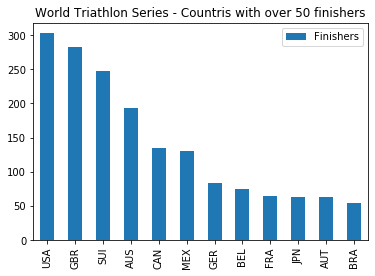

In [17]:
overfifty.plot.bar(title='World Triathlon Series - Countris with over 50 finishers')

### Data visualization from three sources - plot of gender at each event

In [18]:
# query gender from world triathlon series race
query = """SELECT Gender FROM wts;"""
A1 = pd.read_sql(query, conn)

In [19]:
# query gender from ironman race
query = """SELECT Gender FROM im;"""
A2 = pd.read_sql(query, conn)

In [20]:
# query gender from challenge family race
query = """SELECT Gender FROM cf;"""
A3 = pd.read_sql(query, conn)

In [21]:
# get counts for each gender at each race, query stored as DF
wts_gender = pd.DataFrame(A1['Gender'].value_counts())
im_gender = pd.DataFrame(A2['Gender'].value_counts())
cf_gender = pd.DataFrame(A3['Gender'].value_counts())

In [22]:
# rename the columns from gender
wts_gender.columns=['WTS']
im_gender.columns=['IM']
cf_gender.columns=['CF']

In [23]:
# transpose the DF
wts_gender=wts_gender.transpose()
im_gender=im_gender.transpose()
cf_gender=cf_gender.transpose()

In [24]:
# combine the dfs
test = wts_gender.append(im_gender).append(cf_gender)

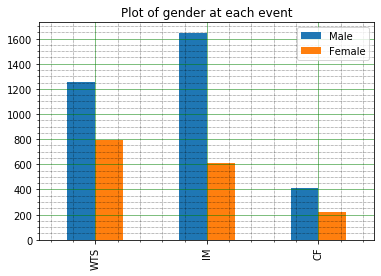

In [25]:
#plot the DF
test.plot(kind='bar',title='Plot of gender at each event')
# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

### Data visualization from three sources - plot of top 5 countries based on # of finishers at each event

In [26]:
# query country from world triathlon series race
query = """SELECT Country FROM wts;"""
B1 = pd.read_sql(query, conn)

In [27]:
# query country from ironman race
query = """SELECT Country FROM im;"""
B2 = pd.read_sql(query, conn)

In [28]:
# query country from challenge famil race
query = """SELECT Country FROM cf;"""
B3 = pd.read_sql(query, conn)

In [29]:
# get counts for each country at each race, take only the largest 5
wts_top5 = pd.DataFrame(B1['Country'].value_counts().nlargest(5))
im_top5 = pd.DataFrame(B2['Country'].value_counts().nlargest(5))
cf_top5 = pd.DataFrame(B3['Country'].value_counts().nlargest(5))

In [30]:
# rename the country column
wts_top5.columns=['WTS']
im_top5.columns=['IM']
cf_top5.columns=['CF']

In [31]:
# transpose the dataframe
wts_top5=wts_top5.transpose()
im_top5=im_top5.transpose()
cf_top5=cf_top5.transpose()

In [32]:
# swap out DEU for GER for comparison purposes
im_top5.rename(columns={'DEU':'GER'}, inplace=True)

In [33]:
# combine the datafrmes
test2 = wts_top5.append(im_top5).append(cf_top5)

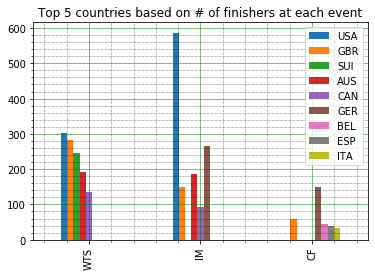

In [34]:
#plot the dataframe
test2.plot(kind='bar',title='Top 5 countries based on # of finishers at each event')
# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

### Data visualization from one source - histogram of finish time in minutes

In [35]:
# query total column from world triathlon series race
query = """SELECT Total FROM wts;"""
zz = pd.DataFrame(pd.read_sql(query, conn))

In [36]:
# change column to timedelta
zz.Total = pd.to_timedelta(zz.Total)

In [37]:
# converts time for entire race into minutes
zz['Total'] = zz['Total'] / np.timedelta64(1, 'm') 

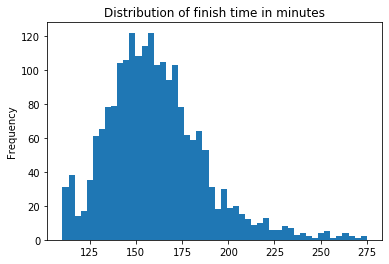

In [38]:
# plot distribution of finish times
(zz['Total']).plot.hist(bins=50,title='Distribution of finish time in minutes')

### Data visualization from one source - histogram of finish time in minutes

In [39]:
# query total column from ironman race
query = """SELECT Total FROM im;"""
yy = pd.DataFrame(pd.read_sql(query, conn))

In [40]:
# change column to timedelta
yy.Total = pd.to_timedelta(yy.Total)

In [41]:
# converts time for entire race into minutes
yy['Total'] = yy['Total'] / np.timedelta64(1, 'm') 

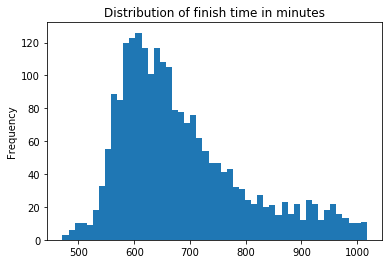

In [42]:
# plot distribution of finish times
(yy['Total']).plot.hist(bins=50,title='Distribution of finish time in minutes')

### Data visualization from multiple sources - bar chart comparing top 5 countries based on place (minimum 5 finishers)

In [43]:
# query country and place from world triathlon series race
query = """SELECT Place, Country FROM wts;"""
C1 = pd.DataFrame(pd.read_sql(query, conn))

In [44]:
# query country and place from ironman race, swap out DEU for GER
query = """SELECT Place, Country FROM im;"""
C2 = pd.DataFrame(pd.read_sql(query, conn))
C2['Country'].replace(['DEU'],['GER'], inplace=True)

In [45]:
# query country and place from challenge famile race
query = """SELECT Place, Country FROM cf;"""
C3 = pd.DataFrame(pd.read_sql(query, conn))

In [46]:
#filter out the countries w/ less than 5 results
C1=pd.DataFrame(C1.groupby('Country').filter(lambda x : len(x)>5))
C2=pd.DataFrame(C2.groupby('Country').filter(lambda x : len(x)>5))
C3=pd.DataFrame(C3.groupby('Country').filter(lambda x : len(x)>5))

In [47]:
#groupby the smallest (test) 5 results
C1=pd.DataFrame(C1.groupby('Country')['Place'].nsmallest(5).reset_index(level=1, drop=True))
C2=pd.DataFrame(C2.groupby('Country')['Place'].nsmallest(5).reset_index(level=1, drop=True))
C3=pd.DataFrame(C3.groupby('Country')['Place'].nsmallest(5).reset_index(level=1, drop=True))

In [48]:
# groupby and sum the 'place' column to determine countries w/ best placing finishers
# take 5 countries with lowest value (best placement of finishers)
C1=pd.DataFrame(C1.groupby('Country')['Place'].sum().sort_values().nsmallest(5))
C2=pd.DataFrame(C2.groupby('Country')['Place'].sum().sort_values().nsmallest(5))
C3=pd.DataFrame(C3.groupby('Country')['Place'].sum().sort_values().nsmallest(5))

In [49]:
# rename columns to race name
C1.columns=['WTS']
C2.columns=['IM']
C3.columns=['CF']

In [50]:
# transpose the dataframes
C1=C1.transpose()
C2=C2.transpose()
C3=C3.transpose()

In [51]:
#combine dataframes
combine = C1.append(C2).append(C3)

C:\Users\longr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


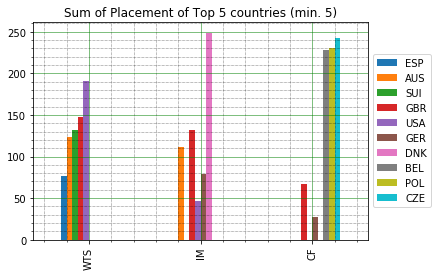

In [52]:
#plot data frame, offset ledgend out
combine.plot(kind='bar',title='Sum of Placement of Top 5 countries (min. 5)')
ax = plt.subplot(111)

# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Data visualization from one source - scatter plot of swim and finish time in minutes from IM race

In [53]:
# query swim and total from ironman race
query = """SELECT Swim, Total FROM im;"""
D1 = pd.DataFrame(pd.read_sql(query, conn))

In [54]:
# convert values to timedelta and 'minutes'
D1.Total = pd.to_timedelta(D1.Total)
D1.Swim = pd.to_timedelta(D1.Swim)
D1['Total'] = D1['Total'] / np.timedelta64(1, 'm') 
D1['Swim'] = D1['Swim'] / np.timedelta64(1, 'm') 

In [55]:
#check change
D1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Swim    2256 non-null   float64
 1   Total   2256 non-null   float64
dtypes: float64(2)
memory usage: 35.4 KB


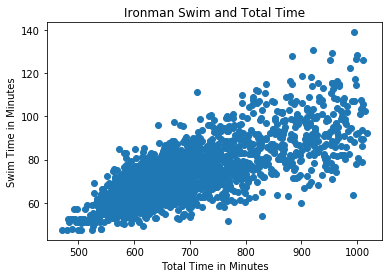

In [56]:
# plot swim time over total time
plt.scatter(D1['Total'], D1['Swim'])
plt.title('Ironman Swim and Total Time')
plt.xlabel("Total Time in Minutes")
plt.ylabel("Swim Time in Minutes")
plt.show()

In [57]:
# close connection
conn.close()